In [44]:
import time
import copy
import numpy as np
from skimage.filters import gaussian
import cv2

import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'imread', 'imsave', 'stack', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Load time-lapse data...

In [63]:
# filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop_bgrem.tif'
# filename = '/Users/jug/Dropbox/ProjectGoldstein/4MyosinMembraneWholeEmbryo.tif'
filename = '/Users/jug/Repositories/GIT/BobSeg/debug_data/MAX_LP320-06-08_Concat-51-100.tif'

stack = imread(filename)
print 'Stack shape:',stack.shape

segchannel = stack[:,1,:,:]
flowchannel = stack[:,0,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian(segchannel,sigma)

print 'Segchannel shape:',segchannel.shape
print 'Single image:',segchannel[0].shape

Stack shape: (50, 2, 595, 403)
Segchannel shape: (50, 595, 403)
Single image: (595, 403)


In [64]:
max_rs = (segchannel[0].shape[1] / 3,
          segchannel[0].shape[1] / 3)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (134, 134)


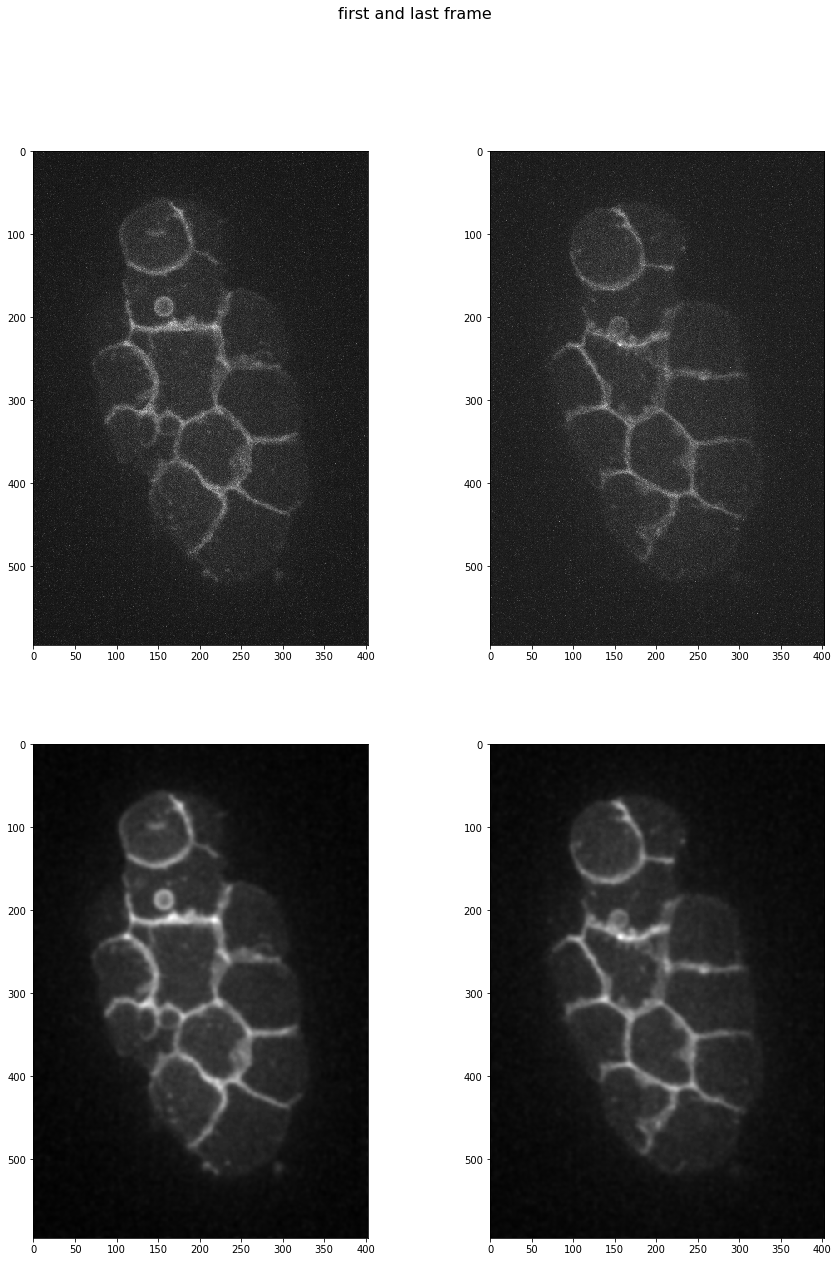

In [65]:
pylab.rcParams['figure.figsize'] = (15, 20)
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(segchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(segchannel[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(segchannel_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(segchannel_smooth[-1], plt.get_cmap('gray'))

# Adding cells

In [66]:
data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=100,max_delta_k=4)
objects = []

### Ea

In [67]:
Ea = data.init_object("Ea")
objects.append(Ea)

In [68]:
data.add_object_at( Ea, min_rs, max_rs, frame=0, seed=(170,250), segment_it=True )
data.track(Ea, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ea" in frame 0 with seed coordinates [ 170.  250.]
      Optimum energy:  0.0209468189479
      Nodes in/out:  2678 4522
      Area:  8594.5
Added appearance for "Ea" in frame 1 with seed coordinates [ 170.  250.]
      Optimum energy:  0.0217246528773
      Nodes in/out:  2677 4523
      Area:  8571.5
    Updated center to [175 253]
Added appearance for "Ea" in frame 2 with seed coordinates [ 175.  253.]
      Optimum energy:  0.0215678895846
      Nodes in/out:  2709 4491
      Area:  8574.5
    Updated center to [177 256]
Added appearance for "Ea" in frame 3 with seed coordinates [ 177.  256.]
      Optimum energy:  0.0216918426559
      Nodes in/out:  2656 4544
      Area:  8150.0
    Updated center to [179 257]
Added appearance for "Ea" in frame 4 with seed coordinates [ 179.  257.]
      Optimum energy:  0.022753290852
      Nodes in/out:  2657 4543
      Area:  8155.5
    Updated center to [180 258]
Added appearance for "Ea" in frame 5 with seed coordinates

      Optimum energy:  0.0181000935512
      Nodes in/out:  2515 4685
      Area:  7397.5
    Updated center to [165 267]
Added appearance for "Ea" in frame 44 with seed coordinates [ 165.  267.]
      Optimum energy:  0.0183495568412
      Nodes in/out:  2494 4706
      Area:  7288.5
    Updated center to [165 268]
Added appearance for "Ea" in frame 45 with seed coordinates [ 165.  268.]
      Optimum energy:  0.0187045638056
      Nodes in/out:  2485 4715
      Area:  7217.0
    Updated center to [165 268]
Added appearance for "Ea" in frame 46 with seed coordinates [ 165.  268.]
      Optimum energy:  0.0174804478529
      Nodes in/out:  2475 4725
      Area:  7161.5
    Updated center to [165 268]
Added appearance for "Ea" in frame 47 with seed coordinates [ 165.  268.]
      Optimum energy:  0.0178466193821
      Nodes in/out:  2472 4728
      Area:  7148.0
    Updated center to [165 268]
Added appearance for "Ea" in frame 48 with seed coordinates [ 165.  268.]
      Optimum energy

In [69]:
data.segment2dt( Ea, max_radial_delta=2 )

Results for frame 0:
      Optimum energy:  0.999353413824
      Area:  8525.5
Results for frame 1:
      Optimum energy:  0.999353413824
      Area:  8568.5
Results for frame 2:
      Optimum energy:  0.999353413824
      Area:  8441.5
Results for frame 3:
      Optimum energy:  0.999353413824
      Area:  8357.0
Results for frame 4:
      Optimum energy:  0.999353413824
      Area:  8105.0
Results for frame 5:
      Optimum energy:  0.999353413824
      Area:  7935.0
Results for frame 6:
      Optimum energy:  0.999353413824
      Area:  7702.0
Results for frame 7:
      Optimum energy:  0.999353413824
      Area:  7739.0
Results for frame 8:
      Optimum energy:  0.999353413824
      Area:  7887.5
Results for frame 9:
      Optimum energy:  0.999353413824
      Area:  7764.0
Results for frame 10:
      Optimum energy:  0.999353413824
      Area:  7725.0
Results for frame 11:
      Optimum energy:  0.999353413824
      Area:  7923.0
Results for frame 12:
      Optimum energy:  0.999

### Ep

In [70]:
Ep = data.init_object("Ep")
objects.append(Ep)

In [71]:
data.add_object_at( Ep, min_rs, max_rs, frame=0, seed=(160,180), segment_it=True )
data.track(Ep, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ep" in frame 0 with seed coordinates [ 160.  180.]
      Optimum energy:  0.0376213945309
      Nodes in/out:  1862 5338
      Area:  5673.0
Added appearance for "Ep" in frame 1 with seed coordinates [ 160.  180.]
      Optimum energy:  0.0359196714034
      Nodes in/out:  1814 5386
      Area:  5194.5
    Updated center to [173 178]
Added appearance for "Ep" in frame 2 with seed coordinates [ 173.  178.]
      Optimum energy:  0.025273882323
      Nodes in/out:  2017 5183
      Area:  5197.5
    Updated center to [180 176]
Added appearance for "Ep" in frame 3 with seed coordinates [ 180.  176.]
      Optimum energy:  0.0219489098372
      Nodes in/out:  2106 5094
      Area:  5273.5
    Updated center to [184 175]
Added appearance for "Ep" in frame 4 with seed coordinates [ 184.  175.]
      Optimum energy:  0.0215408365409
      Nodes in/out:  2061 5139
      Area:  5040.0
    Updated center to [187 174]
Added appearance for "Ep" in frame 5 with seed coordinates

Added appearance for "Ep" in frame 42 with seed coordinates [ 172.  188.]
      Optimum energy:  0.0214411525047
      Nodes in/out:  2482 4718
      Area:  7072.5
    Updated center to [172 188]
Added appearance for "Ep" in frame 43 with seed coordinates [ 172.  188.]
      Optimum energy:  0.0206358426475
      Nodes in/out:  2453 4747
      Area:  6920.0
    Updated center to [172 188]
Added appearance for "Ep" in frame 44 with seed coordinates [ 172.  188.]
      Optimum energy:  0.0202493812329
      Nodes in/out:  2464 4736
      Area:  7018.0
    Updated center to [172 189]
Added appearance for "Ep" in frame 45 with seed coordinates [ 172.  189.]
      Optimum energy:  0.021327842305
      Nodes in/out:  2429 4771
      Area:  6833.0
    Updated center to [172 189]
Added appearance for "Ep" in frame 46 with seed coordinates [ 172.  189.]
      Optimum energy:  0.0194547307907
      Nodes in/out:  2407 4793
      Area:  6713.0
    Updated center to [172 189]
Added appearance for 

In [72]:
data.segment2dt( Ep, max_radial_delta=2 )

Results for frame 0:
      Optimum energy:  1.14764924988
      Area:  6599.0
Results for frame 1:
      Optimum energy:  1.14764924988
      Area:  6736.0
Results for frame 2:
      Optimum energy:  1.14764924988
      Area:  6866.5
Results for frame 3:
      Optimum energy:  1.14764924988
      Area:  6876.5
Results for frame 4:
      Optimum energy:  1.14764924988
      Area:  6932.5
Results for frame 5:
      Optimum energy:  1.14764924988
      Area:  7071.0
Results for frame 6:
      Optimum energy:  1.14764924988
      Area:  7238.5
Results for frame 7:
      Optimum energy:  1.14764924988
      Area:  7281.0
Results for frame 8:
      Optimum energy:  1.14764924988
      Area:  7218.5
Results for frame 9:
      Optimum energy:  1.14764924988
      Area:  7087.5
Results for frame 10:
      Optimum energy:  1.14764924988
      Area:  7145.0
Results for frame 11:
      Optimum energy:  1.14764924988
      Area:  7084.5
Results for frame 12:
      Optimum energy:  1.14764924988
   

# Visualisation stuff 

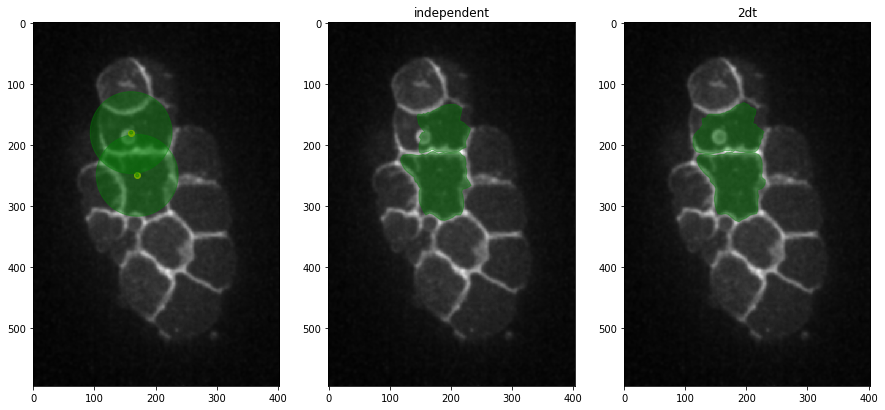

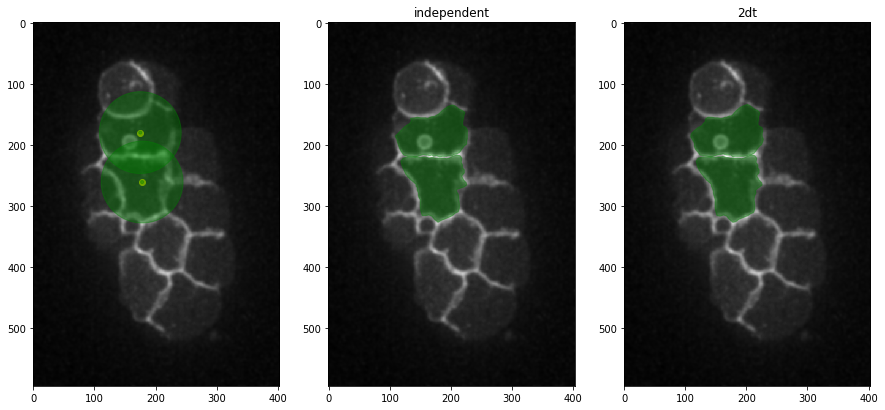

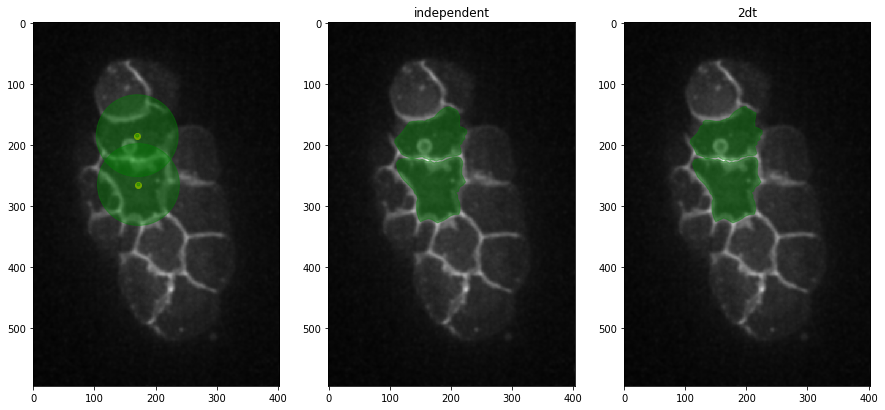

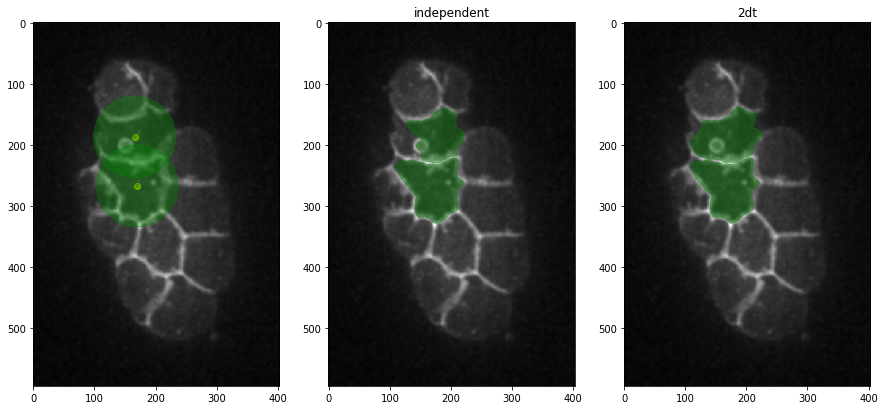

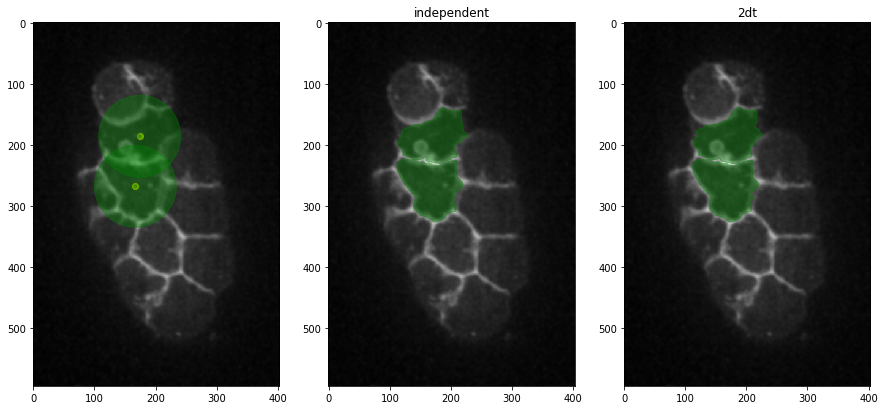

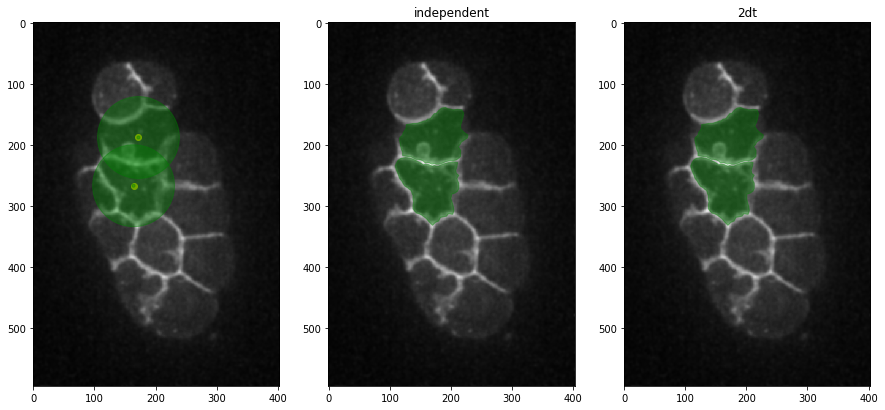

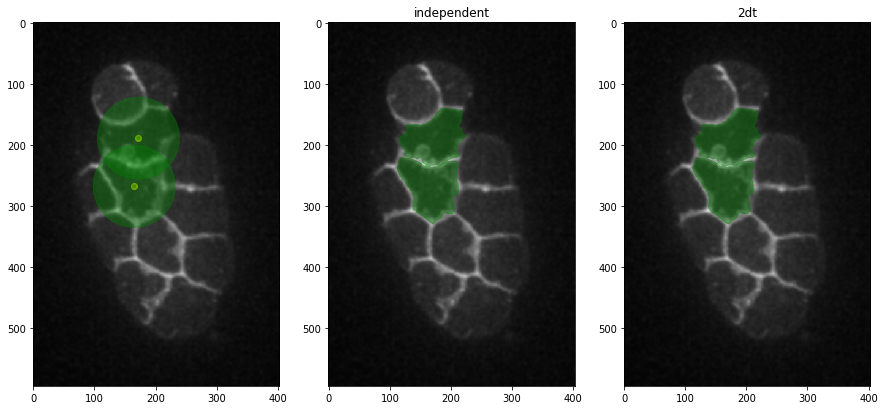

In [73]:
for frame in range(1,len(data.images),len(data.images)/6):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )    
    ax = plt.subplot(133)
    ax.set_title('2dt')
    data.plot_2dt_result( frame, ax )

# FLOW

### See the loaded flow channel images...

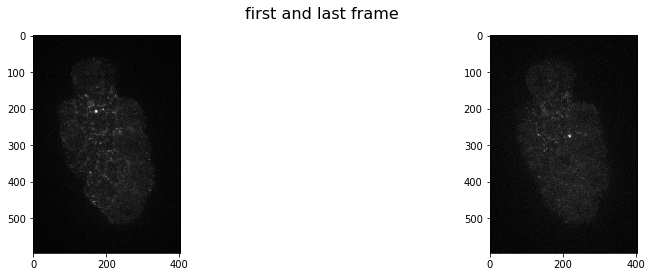

In [74]:
pylab.rcParams['figure.figsize'] = (15, 4)
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(flowchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(flowchannel[-1], plt.get_cmap('gray'))

In [75]:
data.compute_flow( flowchannel, 
                   segchannel, 
                   folder='/Users/jug/Repositories/GIT/BobSeg/frames3d_tempconsistent_newFeatureTest/', 
                   show=True, 
                   inline=False )

## Export Data (for figure creation)

In [76]:
folder = '/Users/jug/Repositories/GIT/BobSeg/export/'

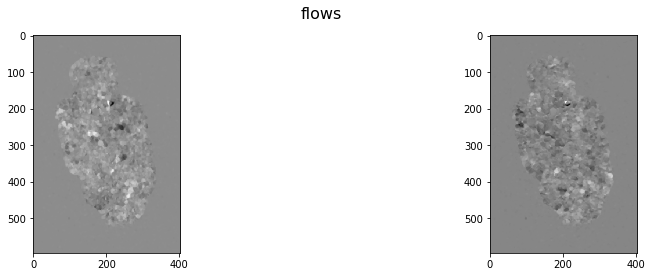

In [77]:
fig = plt.figure()
fig.suptitle('flows', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(np.array(data.flows[1])[:,:,0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(np.array(data.flows[1])[:,:,1], plt.get_cmap('gray'))

In [78]:
imsave(folder+'flow.tiff', np.swapaxes(np.swapaxes(data.flows,1,3),2,3))
imsave(folder+'stack.tiff', stack)